In [92]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

**Read the tweet data into a DataFrame**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv')

In [3]:
data.to_csv('modi_tweets.csv',index=False)

In [13]:
data.head(2)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


**Convert all text lower case**

In [49]:
docs = data['text'].str.lower()

**Regular Expression**

In [50]:
docs[0].replace('the','')

" president's address wonderfully encapsulated india's strengths, aspirations, potential &amp;  efforts towards #transformingindia."

**Retain alphabets , remove everything else**

In [51]:
docs = docs.str.replace('[^a-z#@ ]','')
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [53]:
docs = docs.str.split(' ')

**List of Lists**

In [57]:
word_rows = docs.tolist()

In [78]:
words_all = []
for i in word_rows:
    words_all.extend(i)
len(words_all)

56862

**Frequency Distribution of Words**

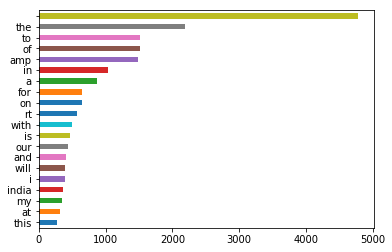

In [90]:
pd.Series(words_all).value_counts().head(20).sort_values().plot.barh()

**Remove stop words**

In [105]:
common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['','amp','rt']
all_stop_words = np.hstack([common_stop_words,custom_stop_words])
len(all_stop_words)

182

**Stemming**

In [121]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('playing'),' - correct stem')
print(stemmer.stem('organization'),' - incorrect stem')

play  - correct stem
organ  - incorrect stem


**In one cell**

In [187]:
docs = data['text']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]','')
docs = docs.str.split(' ')
words_rows = docs.tolist()
words_all = [] # huge list - 59k [] 
docs_clean = [] # stemmed and cleaned sentences joined with space.
words_rows_clean = [] # list of lists [ [],[],[] ... ] 
hashtags = []
for row in words_rows:
    row_words = [stemmer.stem(word) for word in row if word not in all_stop_words]    # stemmed
    words_rows_clean.append(row_words) # clean words 
    docs_clean.append(' '.join(row_words))    
    words_all.extend(row_words)
words_all = pd.Series(words_all)
#words_all.value_counts().head(20).plot.barh()

In [179]:
print(len(words_all))
print(len(words_rows_clean))
print(len(docs_clean))

32422
3220
3220


### Document Term Matrix or Term Document Matrix <br>
    - From the list of sentences find out the unique words <br>
    - Documents in rows (Document Term) , Term in rows ( Term Document) 
    - High Dimensional Data
    - Sparse Matrix

In [180]:
from sklearn.feature_extraction.text import CountVectorizer

In [181]:
model = CountVectorizer()
sparse_matrix = model.fit_transform(docs_clean)
sparse_matrix

<3220x7340 sparse matrix of type '<class 'numpy.int64'>'
	with 31644 stored elements in Compressed Sparse Row format>

In [182]:
print('Total Elements      : ',(3220*7340))
print('Percentage Non Zero : ',31644 / (3220 * 7340))

Total Elements      :  23634800
Percentage Non Zero :  0.0013388731869954473


In [183]:
dtm = pd.DataFrame(sparse_matrix.toarray(),
                   columns = model.get_feature_names())
print(dtm.shape)
dtm.head()

(3220, 7340)


,aabhar,aadhaar,aadhar,aajtak,aamirkhan,aanandmayi,aap,aawa,aazadisa,abdel,...,yuvstrong,zaidi,zay,zeal,zero,zhejiang,ziara,zimbabw,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


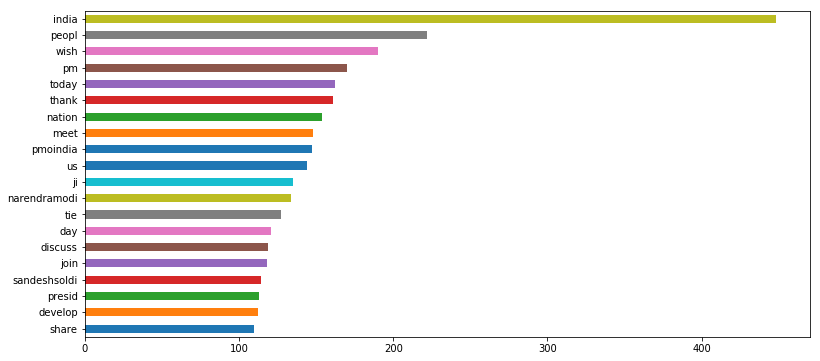

In [184]:
plt.figure(figsize=(13,6))
dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()

**Bi Grams**

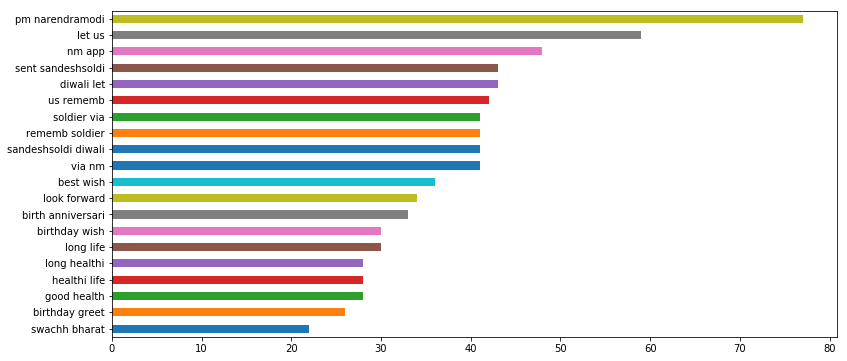

In [185]:
model2 = CountVectorizer(ngram_range=(2,2))
sparse_matrix2 = model2.fit_transform(docs_clean)
dtm2 = pd.DataFrame(sparse_matrix2.toarray(),
                   columns = model2.get_feature_names())
plt.figure(figsize=(13,6))
dtm2.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()